In [2]:
!pip install pymongo

     |████████████████████████████████| 506 kB 23.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 241 kB 22.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 63 kB 1.8 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 60.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install twitter

     |████████████████████████████████| 50 kB 839 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [9]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [11]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid"                               #define the keywords, tweets contain election


In [12]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:26 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:25 +0000 2021'
'Wed Nov 03 20:23:24 +0000 2021'
'Wed Nov 03 20:23:24 +0000 2021'
'Wed Nov 03 20:23:24 +0000 2021'
'Wed Nov 0

In [25]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 03 20:23:07 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:06 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:05 +0000 2021'
'Wed Nov 03 20:23:04 +0000 2021'
'Wed Nov 03 20:23:04 +0000 2021'
'Wed Nov 03 20:23:04 +0000 2021'
'Wed Nov 03 20:23:04 +0000 2021'
'Wed Nov 03 20:23:04 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:22:50 +0000 2021'
'Wed Nov 03 20:22:50 +0000 2021'
'Wed Nov 03 20:22:50 +0000 2021'
'Wed Nov 03 20:22:50 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:49 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 03 20:22:48 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:22:29 +0000 2021'
'Wed Nov 03 20:22:29 +0000 2021'
'Wed Nov 03 20:22:29 +0000 2021'
'Wed Nov 03 20:22:29 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:28 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 03 20:22:27 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:22:10 +0000 2021'
'Wed Nov 03 20:22:10 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:09 +0000 2021'
'Wed Nov 03 20:22:08 +0000 2021'
'Wed Nov 03 20:22:08 +0000 2021'
'Wed Nov 03 20:22:08 +0000 2021'
'Wed Nov 03 20:22:08 +0000 2021'
'Wed Nov 03 20:22:08 +0000 2021'
'Wed Nov 03 20:22:08 +0000 2021'
'Wed Nov 03 20:22:08 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:53 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:52 +0000 2021'
'Wed Nov 03 20:21:51 +0000 2021'
'Wed Nov 03 20:21:51 +0000 2021'
'Wed Nov 03 20:21:51 +0000 2021'
'Wed Nov 03 20:21:51 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:35 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:34 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 03 20:21:33 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:21:17 +0000 2021'
'Wed Nov 03 20:21:17 +0000 2021'
'Wed Nov 03 20:21:17 +0000 2021'
'Wed Nov 03 20:21:17 +0000 2021'
'Wed Nov 03 20:21:17 +0000 2021'
'Wed Nov 03 20:21:17 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:16 +0000 2021'
'Wed Nov 03 20:21:15 +0000 2021'
'Wed Nov 03 20:21:15 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:21:00 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:59 +0000 2021'
'Wed Nov 03 20:20:58 +0000 2021'
'Wed Nov 03 20:20:58 +0000 2021'
'Wed Nov 0

'Wed Nov 03 20:20:43 +0000 2021'
'Wed Nov 03 20:20:43 +0000 2021'
'Wed Nov 03 20:20:43 +0000 2021'
'Wed Nov 03 20:20:43 +0000 2021'
'Wed Nov 03 20:20:43 +0000 2021'
'Wed Nov 03 20:20:43 +0000 2021'
'Wed Nov 03 20:20:43 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'
'Wed Nov 03 20:20:42 +0000 2021'


KeyboardInterrupt: 

In [26]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

2377
2272


In [17]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid"}}) # return tweets contain vote

In [19]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Bailey melvin
text: The Covid vaccine does not keep you from getting Covid and it does not keep you from passing Covid on to others.  I… https://t.co/JMlYWpWmPb
----
name: Chris
text: RT @DrTomFrieden: Since the first Covid vaccines were authorized for use, more people have died from Covid than before they were available.…
----
name: Lisa Sibthorpe
text: RT @IrwinGill: We go live now to frontline healthcare workers, keen for a third dose of the Covid vaccine...

#covid #vaccine https://t.co/…
----
name: Andrew..
text: RT @uk_domain_names: Here's what happens when you stop caring.

April 2021: 593 covid deaths
May 2021: 245 covid deaths
June 2021: 398 covi…
----
name: Antonio Rocha (arqueólogo de fin de semana)
text: @Gromit___ No he tenido covid
----
name: Carl F. Lewis
text: Bouta slide with a covid mask 🔫
----
name: Manelim
text: fazendo teste de covid gatas
----
name: ther🦋
text: Tomei a segunda dose da vacina do covid irra
----
name: Francesco votta
text: @HuffPostItalia

In [22]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [23]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,possibly_sensitive,quoted_status,extended_entities
0,6182f0b17175c6d00ad170d5,Wed Nov 03 20:23:08 +0000 2021,1455993969574391815,1455993969574391815,"RT @ncdhhs: November 3, 2021 COVID-19 NC Vacci...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,6182f0b07175c6d00ad17093,Wed Nov 03 20:23:12 +0000 2021,1455993988243206144,1455993988243206144,@JGL_91 “Ohhh you mean the Covid vaccine? You ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455993e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2,6182f0b17175c6d00ad170b5,Wed Nov 03 20:23:10 +0000 2021,1455993979040792576,1455993979040792576,RT @CDCgov: Parents and Caregivers: CDC recomm...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,117,0,False,False,en,NaN,NaN,NaN,NaN,NaN
3,6182f0af7175c6d00ad1705a,Wed Nov 03 20:23:15 +0000 2021,1455994002667364355,1455994002667364355,All three of my kids are getting their first d...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://itunes.apple.com/us/app/twitte...",NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,6182f0ae7175c6d00ad1703a,Wed Nov 03 20:23:18 +0000 2021,1455994012066848773,1455994012066848773,RT @ianmSC: Fully vaccinated and always masked...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,466,0,False,False,en,1.455943e+18,1455942616898433028,NaN,NaN,NaN
5,6182f0b17175c6d00ad170d6,Wed Nov 03 20:23:08 +0000 2021,1455993969351987204,1455993969351987204,RT @IrwinGill: We go live now to frontline hea...,False,"{'hashtags': [{'text': 'covid', 'indices': [11...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,5,0,False,False,en,NaN,NaN,NaN,NaN,NaN
6,6182efbf7175c6d00ad16fdf,Wed Nov 03 20:23:23 +0000 2021,1455994035680727044,1455994035680727044,"RT @VP: For the last 18 months, parents have w...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,478,0,False,False,en,1.455916e+18,1455915679756980224,NaN,NaN,NaN
7,6182efc07175c6d00ad17015,Wed Nov 03 20:23:20 +0000 2021,1455994022477107215,1455994022477107215,RT @charliespiering: 20 minutes — event on Cov...,False,"{'hashtags': [{'text': 'HowLateIsJoeBiden', 'i...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,7,0,False,False,en,NaN,NaN,NaN,NaN,NaN
8,6182f0b17175c6d00ad170b9,Wed Nov 03 20:23:09 +0000 2021,1455993977379999746,1455993977379999746,RT @atrupar: If you haven't been following thi...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,523,0,False,False,en,1.455916e+18,1455915987669299202,NaN,NaN,NaN
9,6182f0b27175c6d00ad170e5,Wed Nov 03 20:23:07 +0000 2021,1455993966168530944,1455993966168530944,"RT @MrAhmednurAli: It's weird how in Ontario, ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,78,0,False,False,en,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

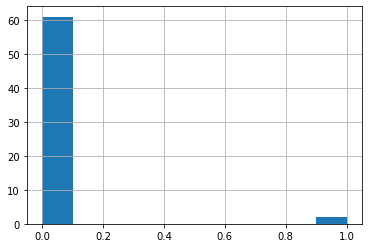

In [24]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count
